In [1]:
import pandas as pd
import numpy as np



In [2]:
#!pip install keras
#!pip install tensorflow
#!pip install imblearn



In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense

# Load data
data = pd.read_csv('creditcard_hugefraud.csv')
col_del = ['Time' ,'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19', 'Amount']
tr_data = data.drop(col_del, axis=1)

# Split data into input and labels
X = tr_data.drop(['Class'], axis='columns')
y = tr_data['Class']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Reshape input to be 3D [samples, timesteps, features] (required by LSTM)
train_LSTM_X = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
val_LSTM_X = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Convert labels to categorical
train_LSTM_y = np.array(y_train)
val_LSTM_y = np.array(y_test)

# Define model
model = Sequential()
model.add(LSTM(50, input_shape=(train_LSTM_X.shape[1], train_LSTM_X.shape[2]), dropout=0.3, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define callbacks
callbacks = [EarlyStopping(monitor='val_loss', patience=5),
             ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]

# Fit model
history = model.fit(train_LSTM_X, train_LSTM_y, epochs=100, batch_size=20000, validation_data=(val_LSTM_X, val_LSTM_y), callbacks=callbacks)

# Load best model
model = load_model('best_model.h5')

# Evaluate model on test set
_, test_acc = model.evaluate(val_LSTM_X, val_LSTM_y, verbose=0)
print('Test accuracy:', test_acc)

# Predict probabilities for test set
yhat_probs = model.predict(val_LSTM_X, verbose=0).round()

# Calculate metrics
accuracy = (yhat_probs == val_LSTM_y).mean()
precision = (yhat_probs[yhat_probs == 1] == val_LSTM_y[yhat_probs == 1]).mean()
recall = (yhat_probs[yhat_probs == 1] == val_LSTM_y[yhat_probs == 1]).sum() / val_LSTM_y.sum()
f1 = 2 * precision * recall / (precision + recall)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)

2023-03-11 21:58:09.314372: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-03-11 21:58:09.314415: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ip-172-16-18-246.ec2.internal): /proc/driver/nvidia/version does not exist
2023-03-11 21:58:09.314971: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


ValueError: Exception encountered when calling layer 'lstm_cell' (type LSTMCell).

Shape must be at least rank 3 but is rank 2 for '{{node lstm/lstm_cell/BiasAdd}} = BiasAdd[T=DT_FLOAT, data_format="NCHW"](lstm/lstm_cell/MatMul, lstm/lstm_cell/split_1)' with input shapes: [?,50], [50].

Call arguments received by layer 'lstm_cell' (type LSTMCell):
  • inputs=tf.Tensor(shape=(None, 9), dtype=float32)
  • states=('tf.Tensor(shape=(None, 50), dtype=float32)', 'tf.Tensor(shape=(None, 50), dtype=float32)')
  • training=None

In [2]:
from keras import layers
import tensorflow as tf
print(tf.__version__)

2.11.0


In [3]:
import keras as ks
ks.__version__

'2.11.0'

In [4]:
data = pd.read_csv('creditcard_hugefraud.csv', na_filter=True)
col_del = ['Time' ,'PC1', 'PC2', 'PC3', 'PC4', 'PC5','PC6','PC7', 'PC8',  'PC9', 'PC10', 'PC11','PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19', 'Amount']
     


In [5]:
data.shape


(284807, 31)

In [9]:
tr_data = data.drop(col_del,axis =1)

tr_data.shape

(284807, 10)

In [7]:

#X = tr_data.drop(['Class'], axis = 'columns')
#Label_Data = tr_data['Class']

In [10]:
# Generate and plot imbalanced classification dataset
from collections import Counter
from matplotlib import pyplot
from numpy import where
# summarize class distribution
counter = Counter(tr_data['Class'])
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(tr_data['Class'] == label)[0]
     

Counter({0: 199251, 1: 85556})


In [11]:

# transform the dataset
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_r, y = oversample.fit_resample(X, tr_data['Class'])
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
     

NameError: name 'X' is not defined

In [12]:

#from sklearn.preprocessing import StandardScaler
## Standardizing the data
#X_r2 = StandardScaler().fit_transform(X_r)

In [13]:
#X_train,X_test,y_train,y_test = train_test_split(X_r2, y, test_size=0.3)


In [14]:
#X_train.shape


(278951, 9)

In [15]:
#X_test.shape


(119551, 9)

In [24]:
X = data[:,0:8]
y = data[:,8]

train_size = int(len(X) * 0.67)
X_train, X_test = X[0:train_size,:], X[train_size:len(X),:]
y_train, y_test = y[0:train_size], y[train_size:len(y)]

# Reshape input data to have an additional dimension representing the timesteps
n_timesteps = 10
train_LSTM_X = np.reshape(X_train, (X_train.shape[0], n_timesteps, X_train.shape[1]))
val_LSTM_X = np.reshape(X_test, (X_test.shape[0], n_timesteps, X_test.shape[1]))

# Reshape output data to match the new input shape
train_LSTM_y = y_train.reshape((y_train.shape[0], 1))
val_LSTM_y = y_test.reshape((y_test.shape[0], 1))

# Define the LSTM model
inputs = Input(shape=(n_timesteps, X_train.shape[1]))
x1 = LSTM(50, dropout=0.3, recurrent_dropout=0.2)(inputs)
outputs = Dense(1, activation='sigmoid')(x1)
model = Model(inputs=inputs, outputs=outputs)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the LSTM model
model.fit(train_LSTM_X, train_LSTM_y, validation_data=(val_LSTM_X, val_LSTM_y), epochs=10, batch_size=64)

ValueError: cannot reshape array of size 2510559 into shape (278951,1,1)

In [21]:
# design network
np.random.seed(7)

# X_train et X_val sont des dataframe qui contient les features
train_LSTM_X=X_train
val_LSTM_X=X_test

## Reshape input to be 3D [samples, timesteps, features] (format requis par LSTM)
train_LSTM_X = train_LSTM_X.reshape((train_LSTM_X.shape[0], 1, train_LSTM_X.shape[1]))
val_LSTM_X = val_LSTM_X.reshape((val_LSTM_X.shape[0], 1, val_LSTM_X.shape[1]))




## Recuperation des labels
train_LSTM_y=y_train
val_LSTM_y=y_test
inputs=Input((1,9))
inputs
x1=LSTM(50,dropout=0.3,recurrent_dropout=0.2)(inputs)


ValueError: Exception encountered when calling layer 'lstm_cell_1' (type LSTMCell).

Shape must be at least rank 3 but is rank 2 for '{{node lstm_1/lstm_cell_1/BiasAdd}} = BiasAdd[T=DT_FLOAT, data_format="NCHW"](lstm_1/lstm_cell_1/MatMul, lstm_1/lstm_cell_1/split_1)' with input shapes: [?,50], [50].

Call arguments received by layer 'lstm_cell_1' (type LSTMCell):
  • inputs=tf.Tensor(shape=(None, 9), dtype=float32)
  • states=('tf.Tensor(shape=(None, 50), dtype=float32)', 'tf.Tensor(shape=(None, 50), dtype=float32)')
  • training=None

In [19]:
inputs=Input((1,9))
inputs

<KerasTensor: shape=(None, 1, 9) dtype=float32 (created by layer 'input_3')>

In [20]:
reshaped_input = np.reshape(input_data, (batch_size, sequence_length, input_dim))

x1=LSTM(50,dropout=0.3,recurrent_dropout=0.2)(inputs)
x1

NameError: name 'input_data' is not defined

In [ ]:
x2=LSTM(50,dropout=0.3,recurrent_dropout=0.2)(inputs)


In [ ]:
outputs=Dense(1,activation='sigmoid')(x2)
model=Model(inputs,outputs)

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
history=model.fit(train_LSTM_X, train_LSTM_y,epochs=100,batch_size=20000, validation_data=(val_LSTM_X, val_LSTM_y))


Epoch 1/100
20/20 [==============================] - 6s 172ms/step - loss: 0.6887 - accuracy: 0.5597 - val_loss: 0.6779 - val_accuracy: 0.6238
Epoch 2/100
20/20 [==============================] - 3s 158ms/step - loss: 0.6709 - accuracy: 0.6426 - val_loss: 0.6588 - val_accuracy: 0.6591
Epoch 3/100
20/20 [==============================] - 3s 155ms/step - loss: 0.6529 - accuracy: 0.6693 - val_loss: 0.6379 - val_accuracy: 0.6872
Epoch 4/100
20/20 [==============================] - 3s 157ms/step - loss: 0.6333 - accuracy: 0.6890 - val_loss: 0.6152 - val_accuracy: 0.7157
Epoch 5/100
20/20 [==============================] - 3s 165ms/step - loss: 0.6127 - accuracy: 0.7076 - val_loss: 0.5915 - val_accuracy: 0.7367
Epoch 6/100
20/20 [==============================] - 3s 149ms/step - loss: 0.5917 - accuracy: 0.7244 - val_loss: 0.5681 - val_accuracy: 0.7563
Epoch 7/100
20/20 [==============================] - 3s 161ms/step - loss: 0.5715 - accuracy: 0.7396 - val_loss: 0.5458 - val_accuracy: 0.7668

In [ ]:

# load and evaluate a saved model
from numpy import loadtxt
from keras.models import load_model
 
# load model
model = load_model('Save_Model.h5')
# summarize model.
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1, 9)]            0         
                                                                 
 lstm_11 (LSTM)              (None, 50)                12000     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 12,051
Trainable params: 12,051
Non-trainable params: 0
_________________________________________________________________


In [ ]:
     

# save model and architecture to single file
model.save('Save_Model.h5')
print("Saved model to disk")

Saved model to disk


In [ ]:

# evaluate the model
_, train_acc = model.evaluate(train_LSTM_X, train_LSTM_y, verbose=0)
_, test_acc = model.evaluate(val_LSTM_X, val_LSTM_y, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.472, Test: 0.472


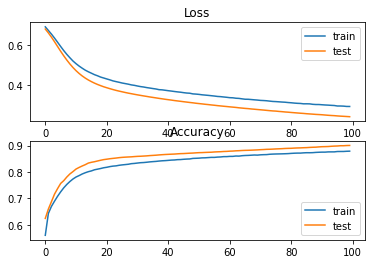

In [ ]:
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:

# predict probabilities for test set
yhat_probs = model.predict(val_LSTM_X, verbose=0).round()
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_probs

array([1., 1., 0., ..., 1., 1., 1.], dtype=float32)

In [ ]:
len(yhat_probs)

170589

In [ ]:
type(yhat_probs)

numpy.ndarray

In [ ]:
type(val_LSTM_y.values)

numpy.ndarray

In [ ]:
val_LSTM_y.values


array([0, 1, 0, ..., 0, 1, 1])

In [ ]:
len(val_LSTM_y)

170589

In [ ]:

# demonstration of calculating metrics for a neural network model using sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

# accuracy: (tp + tn) / (p + n)

accuracy = accuracy_score(val_LSTM_y, yhat_probs)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(val_LSTM_y, yhat_probs)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(val_LSTM_y, yhat_probs)
print('Recall: %f' % recall)


Accuracy: 0.472369
Precision: 0.484182
Recall: 0.845456


In [ ]:


%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [ ]:
cm = confusion_matrix(y_true=val_LSTM_y, y_pred=yhat_probs)


In [ ]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
labels = ['Normal','Fraud']

Confusion matrix, without normalization
[[ 8467 76826]
 [13182 72114]]


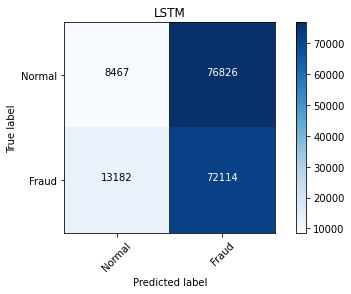

In [ ]:
plot_confusion_matrix(cm=cm, classes=labels, title='LSTM')


In [ ]:
class attention(Layer):
    def __init__(self,**kwargs):
        super(attention,self).__init__(**kwargs)

    def build(self,input_shape):
        self.W=self.add_weight(name="att_weight",shape=(input_shape[-1],1),initializer="normal")
        self.b=self.add_weight(name="att_bias",shape=(input_shape[1],1),initializer="zeros")        
        super(attention, self).build(input_shape)

    def call(self,x):
        et=K.squeeze(K.tanh(K.dot(x,self.W)+self.b),axis=-1)
        at=K.softmax(et)
        at=K.expand_dims(at,axis=-1)
        output=x*at
        return K.sum(output,axis=1)

    def compute_output_shape(self,input_shape):
        return (input_shape[0],input_shape[-1])

    def get_config(self):
        return super(attention,self).get_config()

In [ ]:
inputs1=Input((1,9))
att_in=LSTM(50,return_sequences=True,dropout=0.3,recurrent_dropout=0.2)(inputs1)
att_in_1=LSTM(50,return_sequences=True,dropout=0.3,recurrent_dropout=0.2)(att_in)
att_out=attention()(att_in_1)
outputs1=Dense(1,activation='sigmoid',trainable=True)(att_out)
model1=Model(inputs1,outputs1)
     

In [ ]:

model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
history1=model1.fit(train_LSTM_X, train_LSTM_y,epochs=100,batch_size=30000, validation_data=(val_LSTM_X, val_LSTM_y))


Epoch 1/100
14/14 [==============================] - 15s 629ms/step - loss: 0.6901 - accuracy: 0.5998 - val_loss: 0.6855 - val_accuracy: 0.6723
Epoch 2/100
14/14 [==============================] - 8s 577ms/step - loss: 0.6811 - accuracy: 0.6613 - val_loss: 0.6725 - val_accuracy: 0.6687
Epoch 3/100
14/14 [==============================] - 8s 538ms/step - loss: 0.6655 - accuracy: 0.6628 - val_loss: 0.6497 - val_accuracy: 0.6720
Epoch 4/100
14/14 [==============================] - 7s 534ms/step - loss: 0.6421 - accuracy: 0.6681 - val_loss: 0.6185 - val_accuracy: 0.6880
Epoch 5/100
14/14 [==============================] - 11s 781ms/step - loss: 0.6136 - accuracy: 0.6872 - val_loss: 0.5860 - val_accuracy: 0.7186
Epoch 6/100
14/14 [==============================] - 14s 973ms/step - loss: 0.5860 - accuracy: 0.7130 - val_loss: 0.5569 - val_accuracy: 0.7546
Epoch 7/100
14/14 [==============================] - 12s 862ms/step - loss: 0.5620 - accuracy: 0.7350 - val_loss: 0.5312 - val_accuracy: 0.

In [ ]:

# save Attention model and architecture to single file
model1.save('Save_Model_Attention.h5')
print("Saved model to disk")
     

Saved model to disk


In [ ]:
# load and evaluate a saved model
import tensorflow_hub as hub

from numpy import loadtxt
from keras.models import load_model
 
# load model
model1 = load_model('Save_Model_Attention.h5',custom_objects={'attention':attention})
 #model1 = load_model('Save_Model_Attention.h5',custom_objects={"lr": lr_track })
# summarize model.



model1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1, 9)]            0         
                                                                 
 lstm_2 (LSTM)               (None, 1, 50)             12000     
                                                                 
 lstm_3 (LSTM)               (None, 1, 50)             20200     
                                                                 
 attention (attention)       (None, 50)                51        
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 32,302
Trainable params: 32,302
Non-trainable params: 0
_________________________________________________________________


In [ ]:

# evaluate the model
_, train_acc = model1.evaluate(train_LSTM_X, train_LSTM_y, verbose=0)
_, test_acc = model1.evaluate(val_LSTM_X, val_LSTM_y, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.900, Test: 0.899


In [ ]:
# predict probabilities for test set
yhat_probs1 = model1.predict(val_LSTM_X, verbose=0).round()
# reduce to 1d array
yhat_probs1 = yhat_probs1[:, 0]

In [ ]:
# demonstration of calculating metrics for a neural network model using sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(val_LSTM_y, yhat_probs1)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(val_LSTM_y, yhat_probs1)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(val_LSTM_y, yhat_probs1)
print('Recall: %f' % recall)


Accuracy: 0.898698
Precision: 0.922732
Recall: 0.870275


In [ ]:
cm1 = confusion_matrix(y_true=val_LSTM_y, y_pred=yhat_probs1)


Confusion matrix, without normalization
[[79077  6216]
 [11065 74231]]


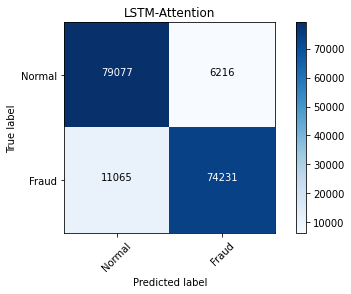

In [ ]:
plot_confusion_matrix(cm=cm1, classes=labels, title='LSTM-Attention', normalize=False)
